In [1]:
%config IPCompleter.greedy = True
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Decision Trees

**Decision Trees (DTs)** are a non-parametric supervised learning method
used for *classification* and *regression*. A flow chart like tree, where each branch node represents a binary descision based on a feature condition leading to leaf nodes which are the predicted output for those samples (Classes in classification trees or numeric values in regression trees).

The goal is to create a model that predicts the value of a target variable by learning simple
binary decision rules inferred from the data features.

Decision Tree example :

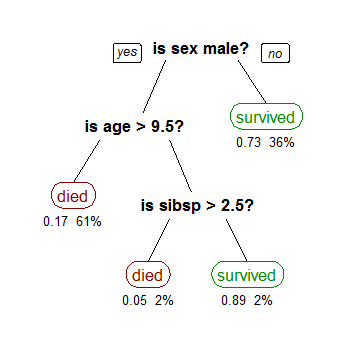

> A tree showing survival of passengers on the Titanic ("sibsp" is the number of spouses or siblings aboard). The figures under the leaves show the probability of survival and the percentage of observations in the leaf. Summarizing: Your chances of survival were good if you were (i) a female or (ii) a male younger than 9.5 years with less than 2.5 siblings.

Some advantages of decision trees are:

> -   Simple to understand and to interpret. Trees can be visualised, white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
> -   Possible to validate a model using statistical tests. That makes
>     it possible to account for the reliability of the model.
> -   Invariant to data normalisation, however sensitive to data rotation (can be removed through reducing the input feature dimensions to be orthogonal using principal component analysis).

The disadvantages of decision trees include:

> -   Decision-tree learners can create over-complex trees that do not
>     generalise the data well. This is called overfitting. Mechanisms
>     such as pruning (not currently supported), setting the minimum
>     number of samples required at a leaf node or setting the maximum
>     depth of the tree are necessary to avoid this problem.
> -   The problem of learning an optimal decision tree is known to be
>     NP-complete under several aspects of optimality and even for
>     simple concepts. Consequently, practical decision-tree learning
>     algorithms are based on heuristic algorithms such as the greedy
>     algorithm where locally optimal decisions are made at each node.
>     Such algorithms cannot guarantee to return the globally optimal
>     decision tree. This can be mitigated by training multiple trees in
>     an ensemble learner, where the features and samples are randomly
>     sampled with replacement.
> -   Decision tree learners create biased trees if some classes
>     dominate. It is therefore recommended to balance the dataset prior
>     to fitting with the decision tree.

# Tree Classification

`DecisionTreeClassifier` is a class
capable of performing multi-class classification on a dataset.

As with other classifiers, `DecisionTreeClassifier` takes as input two arrays: an array X, sparse or dense, of
size `[n_samples, n_features]` holding the training samples, and an
array Y of integer values, size `[n_samples]`, holding the class labels
for the training samples:



In [2]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)


After being fitted, the model can then be used to predict the class of
samples:


In [3]:
clf.predict([[2., 2.]])

array([1])

Alternatively, the probability of each class can be predicted, which is
the fraction of training samples of the same class in a leaf:

In [4]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

`DecisionTreeClassifier` is capable of
both binary (where the labels are \[-1, 1\]) classification and
multiclass (where the labels are \[0, \..., K-1\]) classification.

Using the Iris dataset, we can construct a tree as follows:

In [5]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Once trained, you can plot the tree with the plot\_tree function:

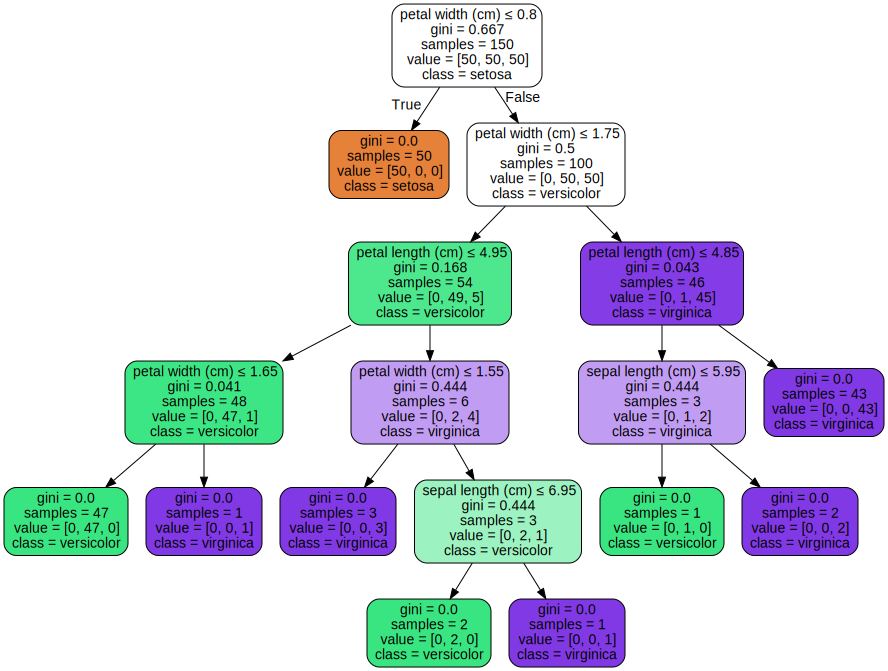

In [6]:
import graphviz

iris = load_iris()
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

* Samples is how many training samples are valid under those conditions
* Value shows the class distribution of those samples
* Class represents most likley class for that node, i.e. the class that has the most samples for that node
* Gini, a measure class *impurity* ($0<gini<0.5$)
  * `gini=0` if all samples belong to one class in that node
  * `gini=0.5` is equally distributed samples in each class
  * $gini=\sum_k p_{mk} (1 - p_{mk})$ where $p_{mk}$ is the proportion of class $k$ observations in node $m$

Alternatively, the tree can also be exported in textual format with the function export_text. This method doesn’t require the installation of external libraries and is more compact:

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples.

We also show the tree structure of a model built on all of the features.

(0.0, 7.88, -0.9, 3.4800000000000044)

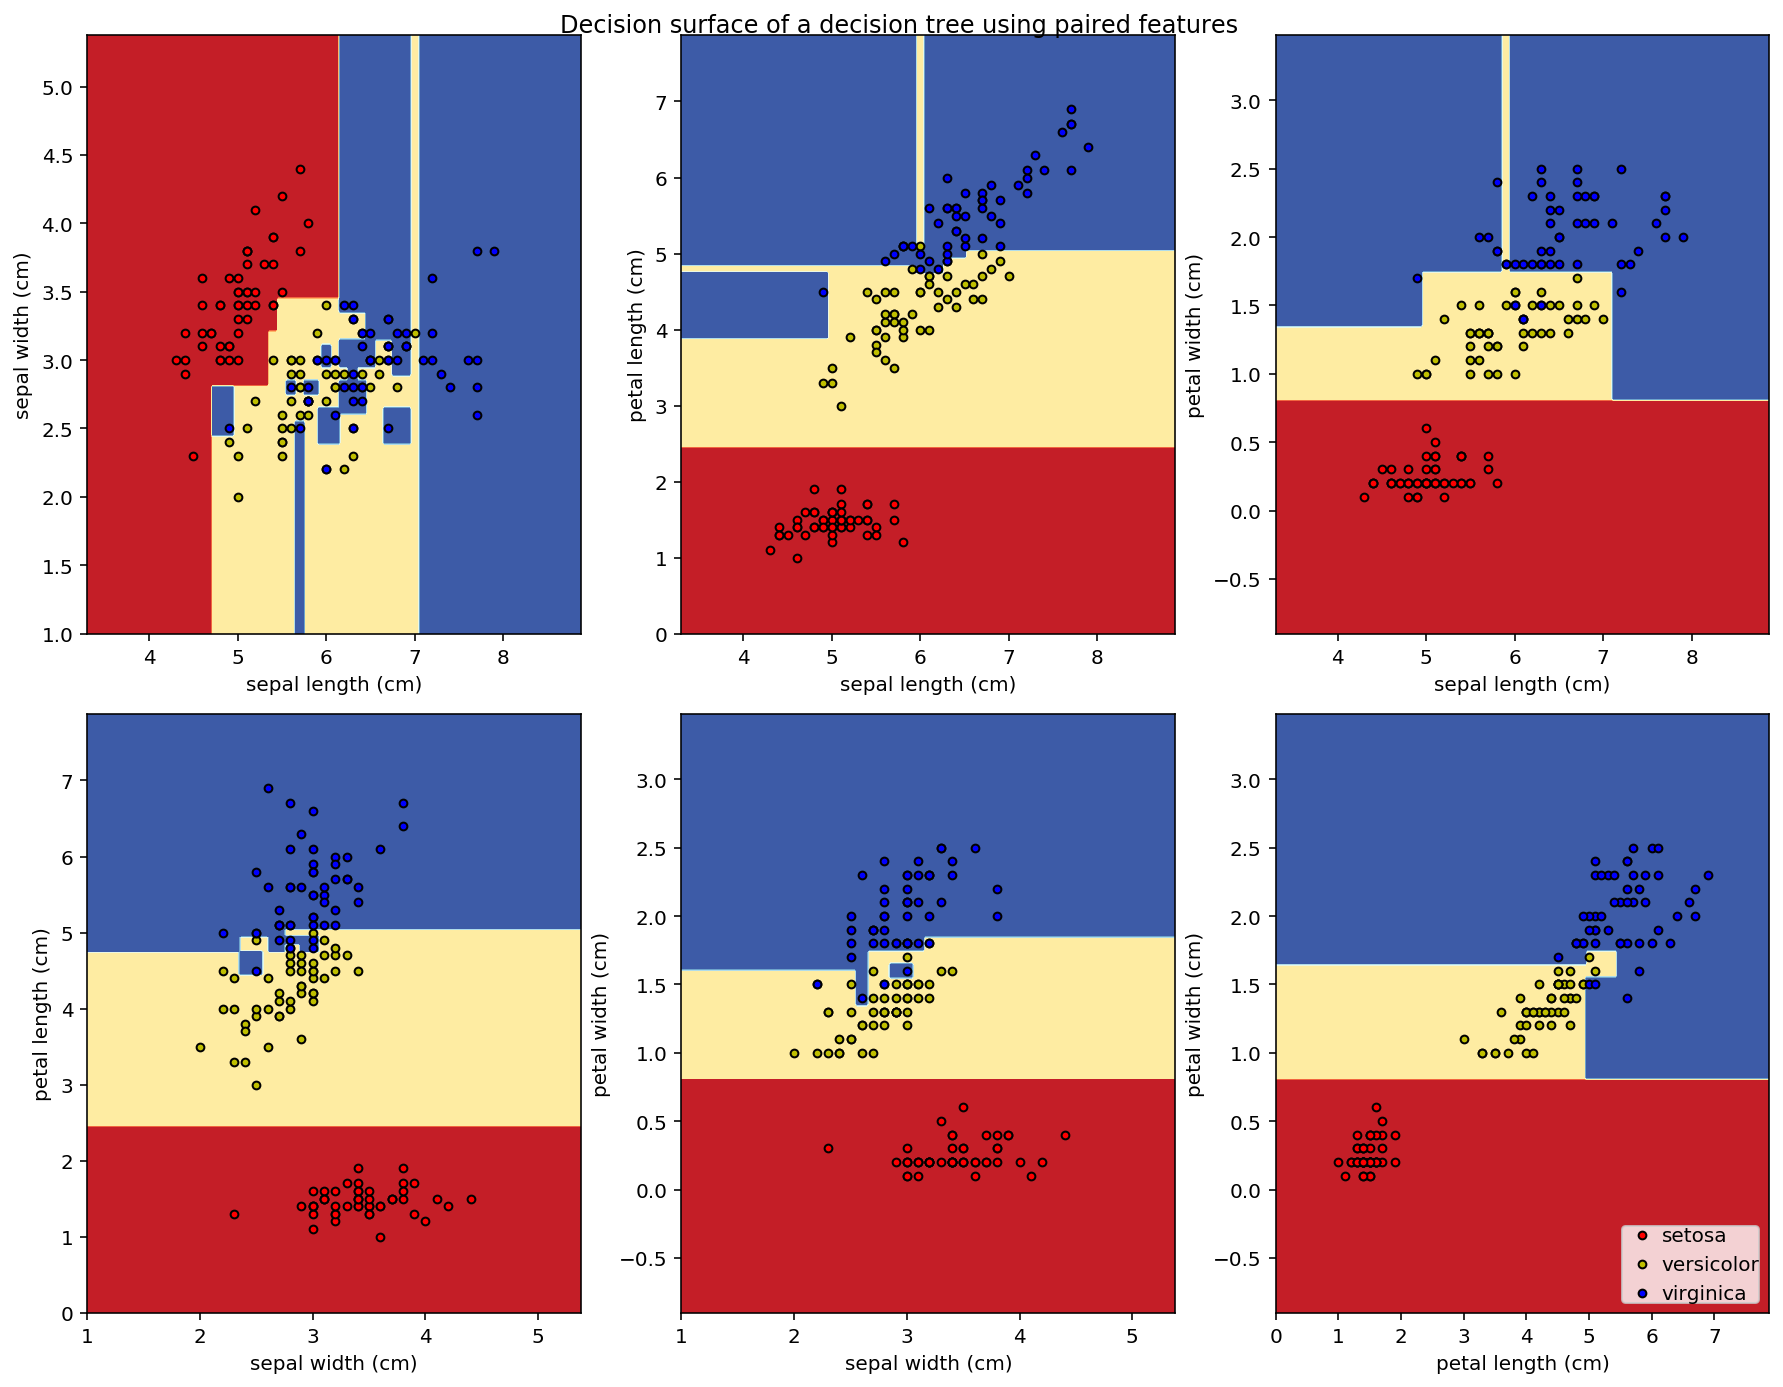

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

fig = plt.figure(figsize=(13, 10))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

# Regression

Decision trees can also be applied to regression problems, using the
`DecisionTreeRegressor` class.

As in the classification setting, the fit method will take as argument
arrays X and y, only that in this case y is expected to have floating
point values instead of integer values:


In [9]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([0.5])

A 1D regression with decision tree.

The decision trees is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve.

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, i.e. they overfit.

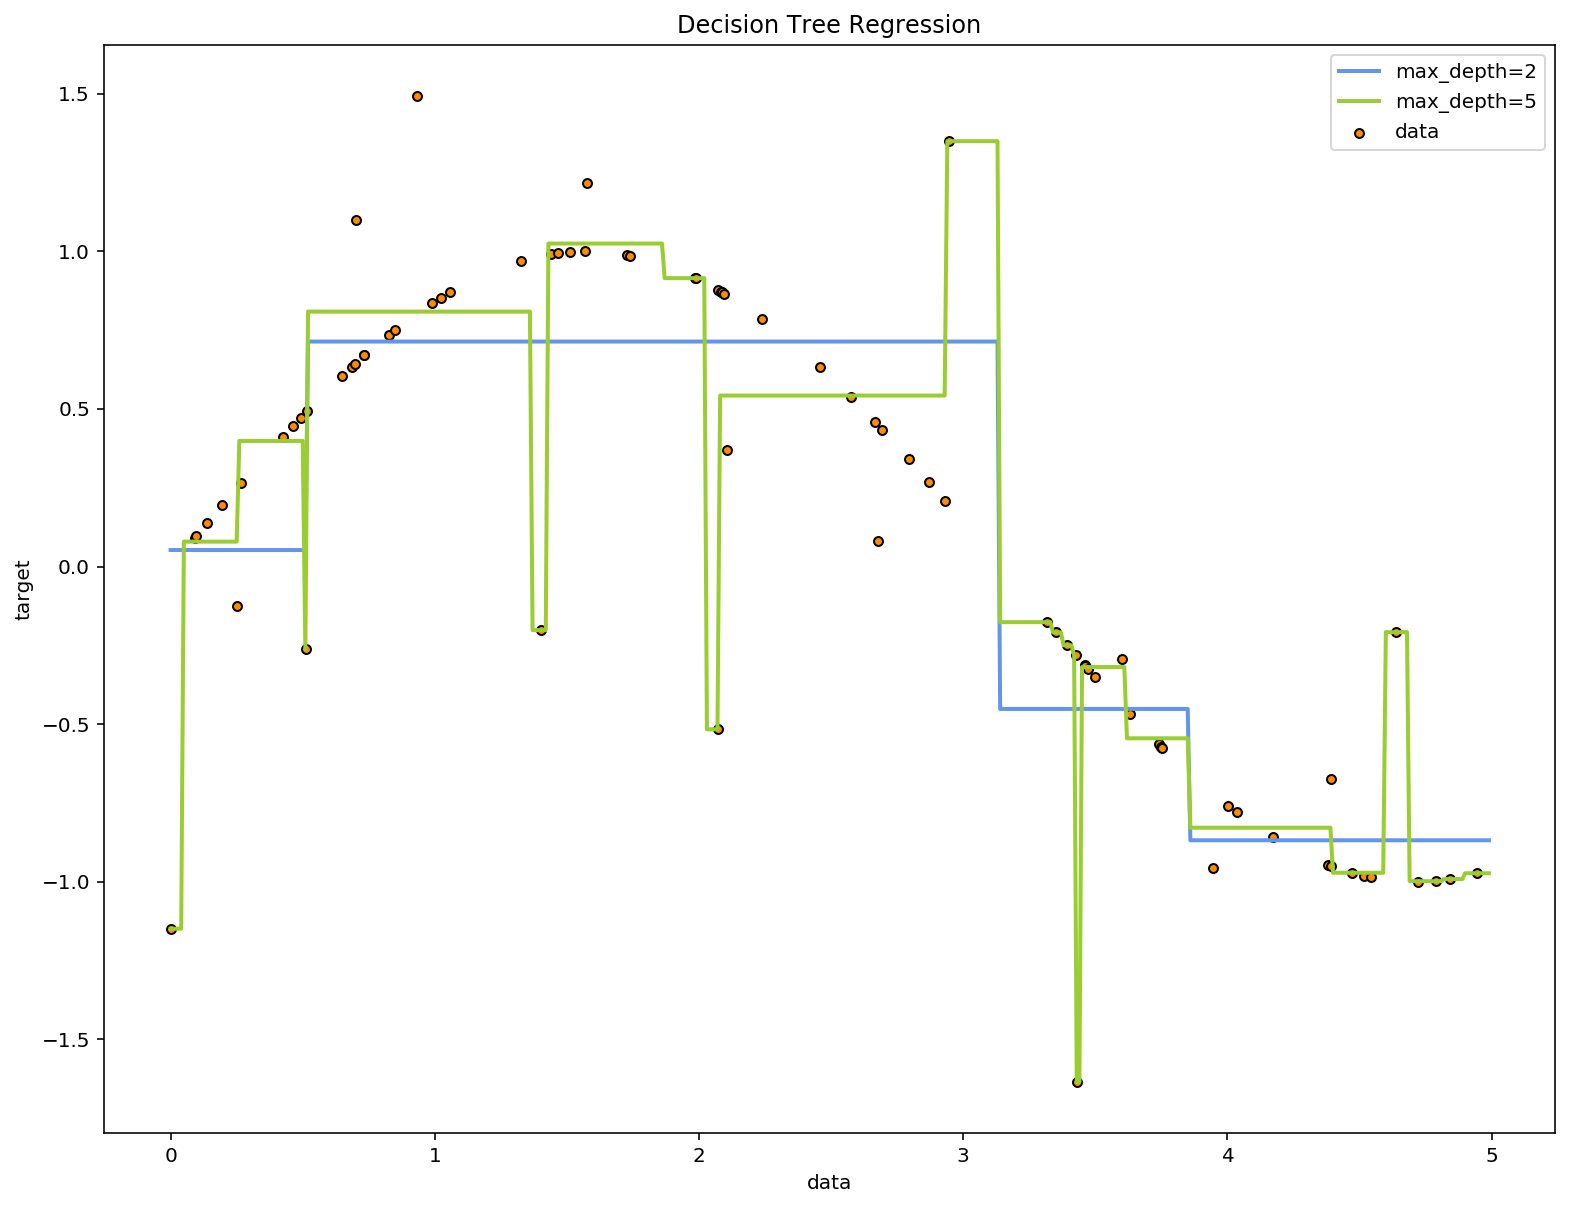

In [10]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(13, 10))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

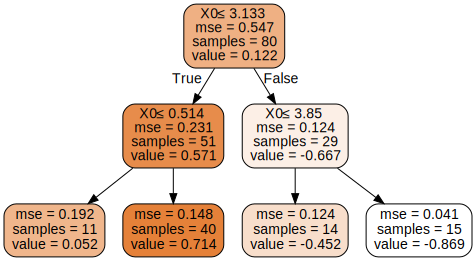

In [11]:
import graphviz

iris = load_iris()
dot_data = tree.export_graphviz(regr_1, out_file=None,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Multi-output problems

A multi-output problem is a supervised learning problem with several
outputs to predict, that is when Y is a 2d array of size
`[n_samples, n_outputs]`.

When there is no correlation between the outputs, a very simple way to
solve this kind of problem is to build n independent models, i.e. one
for each output, and then to use those models to independently predict
each one of the n outputs. However, because it is likely that the output
values related to the same input are themselves correlated, an often
better way is to build a single model capable of predicting
simultaneously all n outputs. First, it requires lower training time
since only a single estimator is built. Second, the generalization
accuracy of the resulting estimator may often be increased.

With regard to decision trees, this strategy can readily be used to
support multi-output problems. This requires the following changes:

> -   Store n output values in leaves, instead of 1;
> -   Use splitting criteria that compute the average reduction across
>     all n outputs.

This module offers support for multi-output problems by implementing
this strategy in both `DecisionTreeClassifier` and `DecisionTreeRegressor`. If a decision tree is fit on an output array Y of size
`[n_samples, n_outputs]` then the resulting estimator will:

> -   Output n\_output values upon `predict`;
> -   Output a list of n\_output arrays of class probabilities upon
>     `predict_proba`.

## Complexity

In general, the run time cost to construct a balanced binary tree is
$O(n_{samples}n_{features}\log(n_{samples}))$ and query time
$O(\log(n_{samples}))$. Although the tree construction algorithm
attempts to generate balanced trees, they will not always be balanced.
Assuming that the subtrees remain approximately balanced, the cost at
each node consists of searching through $O(n_{features})$ to find the
feature that offers the largest reduction in entropy. This has a cost of
$O(n_{features}n_{samples}\log(n_{samples}))$ at each node, leading to a
total cost over the entire trees (by summing the cost at each node) of
$O(n_{features}n_{samples}^{2}\log(n_{samples}))$.

## Tips on practical use

> -   Decision trees tend to overfit on data with a large number of
>     features. Getting the right ratio of samples to number of features
>     is important, since a tree with few samples in high dimensional
>     space is very likely to overfit.
> -   Consider performing dimensionality reduction
>     (`PCA <PCA>`,
>     `ICA <ICA>`, or
>     `feature_selection`) beforehand to
>     give your tree a better chance of finding features that are
>     discriminative.
> -   Remember that the number of samples required to populate the tree
>     doubles for each additional level the tree grows to. Use
>     `max_depth` to control the size of the tree to prevent
>     overfitting.
> -   Use `min_samples_split` or `min_samples_leaf` to ensure that
>     multiple samples inform every decision in the tree, by controlling
>     which splits will be considered. A very small number will usually
>     mean the tree will overfit, whereas a large number will prevent
>     the tree from learning the data. Try `min_samples_leaf=5` as an
>     initial value. If the sample size varies greatly, a float number
>     can be used as percentage in these two parameters. While
>     `min_samples_split` can create arbitrarily small leaves,
>     `min_samples_leaf` guarantees that each leaf has a minimum size,
>     avoiding low-variance, over-fit leaf nodes in regression problems.
>     For classification with few classes, `min_samples_leaf=1` is often
>     the best choice.
> -   Balance your dataset before training to prevent the tree from
>     being biased toward the classes that are dominant. Class balancing
>     can be done by sampling an equal number of samples from each
>     class, or preferably by normalizing the sum of the sample weights
>     (`sample_weight`) for each class to the same value. Also note that
>     weight-based pre-pruning criteria, such as
>     `min_weight_fraction_leaf`, will then be less biased toward
>     dominant classes than criteria that are not aware of the sample
>     weights, like `min_samples_leaf`.
> -   If the samples are weighted, it will be easier to optimize the
>     tree structure using weight-based pre-pruning criterion such as
>     `min_weight_fraction_leaf`, which ensure that leaf nodes contain
>     at least a fraction of the overall sum of the sample weights.



## Tree algorithm

CART (Classification and Regression Trees) constructs binary trees using the
feature and threshold that yield the largest information gain at each
node.

Scikit-learn uses an optimised version of the CART algorithm; however,
scikit-learn implementation does not support categorical variables for
now.

## Mathematical formulation
Given training vectors $x_i \in R^n$, i=1,\..., l and a label vector
$y \in R^l$, a decision tree recursively partitions the space such that
the samples with the same labels are grouped together.

Let the data at node $m$ be represented by $Q$. For each candidate split
$\theta = (j, t_m)$ consisting of a feature $j$ and threshold $t_m$,
partition the data into $Q_{left}(\theta)$ and $Q_{right}(\theta)$
subsets

$$Q_{left}(\theta) = {(x, y) | x_j <= t_m}$$$$Q_{right}(\theta) = Q \setminus Q_{left}(\theta)$$

The impurity at $m$ is computed using an impurity function $H()$, the
choice of which depends on the task being solved (classification or
regression)

$$G(Q, \theta) = \frac{n_{left}}{N_m} H(Q_{left}(\theta))
+ \frac{n_{right}}{N_m} H(Q_{right}(\theta))$$

Select the parameters that minimises the impurity

$$\theta^* = \operatorname{argmin}_\theta  G(Q, \theta)$$

Recurse for subsets $Q_{left}(\theta^*)$ and $Q_{right}(\theta^*)$ until
the maximum allowable depth is reached, $N_m < \min_{samples}$ or
$N_m = 1$.

### Classification criteria

If a target is a classification outcome taking on values 0,1,\...,K-1,
for node $m$, representing a region $R_m$ with $N_m$ observations, let

$$p_{mk} = 1/ N_m \sum_{x_i \in R_m} I(y_i = k)$$

be the proportion of class k observations in node $m$

Common measures of impurity are Gini

$$H(X_m) = \sum_k p_{mk} (1 - p_{mk})$$

Entropy

$$H(X_m) = - \sum_k p_{mk} \log(p_{mk})$$

and Misclassification

$$H(X_m) = 1 - \max(p_{mk})$$

where $X_m$ is the training data in node $m$

### Regression criteria

If the target is a continuous value, then for node $m$, representing a
region $R_m$ with $N_m$ observations, common criteria to minimise as for
determining locations for future splits are Mean Squared Error, which
minimizes the L2 error using mean values at terminal nodes, and Mean
Absolute Error, which minimizes the L1 error using median values at
terminal nodes.

Mean Squared Error:

$$\bar{y}_m = \frac{1}{N_m} \sum_{i \in N_m} y_i$$$$H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} (y_i - \bar{y}_m)^2$$

Mean Absolute Error:

$$\bar{y}_m = \frac{1}{N_m} \sum_{i \in N_m} y_i$$$$H(X_m) = \frac{1}{N_m} \sum_{i \in N_m} |y_i - \bar{y}_m|$$

where $X_m$ is the training data in node $m$

### Minimal Cost-Complexity Pruning

Minimal cost-complexity pruning is an algorithm used to prune a tree to
avoid over-fitting. This
algorithm is parameterized by $\alpha\ge0$ known as the complexity
parameter. The complexity parameter is used to define the
cost-complexity measure, $R_\alpha(T)$ of a given tree $T$:

$$R_\alpha(T) = R(T) + \alpha|T|$$

where $|T|$ is the number of terminal nodes in $T$ and $R(T)$ is
traditionally defined as the total misclassification rate of the
terminal nodes. Alternatively, scikit-learn uses the total sample
weighted impurity of the terminal nodes for $R(T)$. As shown above, the
impurity of a node depends on the criterion. Minimal cost-complexity
pruning finds the subtree of $T$ that minimizes $R_\alpha(T)$.

The cost complexity measure of a single node is
$R_\alpha(t)=R(t)+\alpha$. The branch, $T_t$, is defined to be a tree
where node $t$ is its root. In general, the impurity of a node is
greater than the sum of impurities of its terminal nodes, $R(T_t)<R(t)$.
However, the cost complexity measure of a node, $t$, and its branch,
$T_t$, can be equal depending on $\alpha$. We define the effective
$\alpha$ of a node to be the value where they are equal,
$R_\alpha(T_t)=R_\alpha(t)$ or
$\alpha_{eff}(t)=\frac{R(t)-R(T_t)}{|T|-1}$. A non-terminal node with
the smallest value of $\alpha_{eff}$ is the weakest link and will be
pruned. This process stops when the pruned tree\'s minimal
$\alpha_{eff}$ is greater than the `ccp_alpha` parameter.